# Study Catalan Elections Dataset

Load libraries:

In [57]:
import pandas as pd
import pprint
import matplotlib.pyplot as plt
import seaborn as sns

pp = pprint.PrettyPrinter(indent=2)

Load the dataset:

In [11]:
df = pd.read_csv('../../data/raw/catalan-elections-data.csv')

C:\Users\guill\AppData\Local\Temp\ipykernel_31604\501433994.py:1: DtypeWarning: Columns (5,13,14,16,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/raw/catalan-elections-data.csv')


## Dataset Structure

Visualize the structure of the dataset:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19751196 entries, 0 to 19751195
Data columns (total 21 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   index_autonumeric        int64  
 1   id_eleccio               object 
 2   nom_eleccio              object 
 3   id_nivell_territorial    object 
 4   nom_nivell_territorial   object 
 5   territori_codi           object 
 6   territori_nom            object 
 7   secci_                   float64
 8   candidatura_codi         int64  
 9   candidatura_denominacio  object 
 10  candidatura_sigles       object 
 11  vots                     int64  
 12  escons                   float64
 13  candidatura_color        object 
 14  candidatura_logotip      object 
 15  districte                float64
 16  mesa                     object 
 17  candidat_posicio         float64
 18  agrupacio_codi           float64
 19  agrupacio_denominacio    object 
 20  agrupacio_sigles         object 
dtypes: flo

| Column name               | Description                                            | Type      |
|---------------------------|--------------------------------------------------------|-----------|
| INDEX_AUTONUMERIC         | Autonumeric index identifier for the row               | Plain Text|
| ID_ELECCIO                | Identifier of the election (Type+Year+Sequential)      | Plain Text|
| NOM_ELECCIO               | Name of the electoral process                          | Plain Text|
| ID_NIVELL_TERRITORIAL     | Identifier of the territorial level (Municipality, Vegueria, County...) | Plain Text|
| NOM_NIVELL_TERRITORIAL    | Name of the territorial level of the record (Municipality, County...) | Plain Text|
| TERRITORI_CODI            | Territory code                                         | Plain Text|
| TERRITORI_NOM             | Name of the territory                                  | Plain Text|
| DISTRICTE                 | Electoral district                                     | Plain Text|
| SECCIÓ                    | Electoral section                                      | Plain Text|
| MESA                      | Electoral table                                        | Plain Text|
| CANDIDATURA_CODI          | Code of the candidacy                                  | Plain Text|
| CANDIDATURA_DENOMINACIO   | Name of the candidacy                                  | Plain Text|
| CANDIDATURA_SIGLES        | Acronym of the candidacy                               | Plain Text|
| CANDIDAT_POSICIO          | Position of the candidate in the list                  | Plain Text|
| AGRUPACIO_CODI            | Code of the group of candidacies                       | Plain Text|
| AGRUPACIO_DENOMINACIO     | Name of the group of candidacies                       | Plain Text|
| AGRUPACIO_SIGLES          | Acronym of the group of candidacies                    | Plain Text|
| VOTS                      | Votes of the candidacy                                 | Number    |
| ESCONS                    | Seats of the candidacy                                 | Number    |
| CANDIDATURA_COLOR         | Color of the candidacy                                 | Plain Text|
| CANDIDATURA_LOGOTIP       | Logo of the candidacy                                  | Plain Text|

## Check for missing values

Now, we want to count the number of missing values in each column:

In [33]:
# Calculate the proportion of missing values in each column and sort them
df.isnull().mean().sort_values(ascending=False)

candidat_posicio           1.000000
candidatura_logotip        0.687961
agrupacio_sigles           0.685203
agrupacio_denominacio      0.685203
agrupacio_codi             0.685203
mesa                       0.485076
districte                  0.062269
escons                     0.057498
secci_                     0.048412
candidatura_color          0.032793
year                       0.000000
type                       0.000000
index_autonumeric          0.000000
id_eleccio                 0.000000
vots                       0.000000
candidatura_sigles         0.000000
candidatura_denominacio    0.000000
candidatura_codi           0.000000
territori_nom              0.000000
territori_codi             0.000000
nom_nivell_territorial     0.000000
id_nivell_territorial      0.000000
nom_eleccio                0.000000
sequential                 0.000000
dtype: float64

Based on the previous table, we can see that `candidat_posicio` is empty, so we can remove it from the dataset:

In [34]:
# Drop candidat_posicio column
df = df.drop(columns=['candidat_posicio'])

There are lots of empty values in `agrupacio_` columns, but we won't remove them because they'll be usefull to group the candidacies.

## Fix Column Names

The column `secci_` means `secció`, so we'll rename it:

In [45]:
# Rename secci_ column
df = df.rename(columns={'secci_': 'seccio'})

## Types of Elections

Divide `id_eleccio` into `type`, `year` and `sequential`:

In [13]:
df['type'] = df['id_eleccio'].str[:1]
df['year'] = df['id_eleccio'].str[1:5].astype(int)
df['sequential'] = df['id_eleccio'].str[5:]

Show the types of elections:

In [14]:
types = df[['type', 'nom_eleccio']].groupby(['type']).first()
print(types)
print(len(types))

                                   nom_eleccio
type                                          
A     Eleccions al Parlament de Catalunya 1980
C          Eleccions a Consells Comarcals 1987
D     Eleccions a Diputacions Provincials 2007
E          Eleccions al Parlament Europeu 1987
G                    Eleccions al Congrés 1979
M                    Eleccions Municipals 1979
S                      Eleccions al Senat 1993
V     Eleccions al Consell General d'Aran 1991
8


Now we know that the dataset contains data from 8 different types of elections:

| Type | Election Type Name                          |
|------|---------------------------------------------|
| A    | Elections to the Parliament of Catalonia    |
| C    | Elections to the County Councils            |
| D    | Elections to the Provincial Councils        |
| E    | Elections to the European Parliament        |
| G    | Elections to the Congress                   |
| M    | Municipal Elections                         |
| S    | Elections to the Senate                     |
| V    | Elections to the General Council of Aran    |

We only want data from the elections to the Parliament of Catalonia ('A'), municipal elections ('M'), elections to the European Parliament ('E') and elections to the Congress ('G'), so we filter the dataset:

In [15]:
df = df[df['type'].isin(['M', 'E', 'A', 'G'])]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12339340 entries, 0 to 19750961
Data columns (total 24 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   index_autonumeric        int64  
 1   id_eleccio               object 
 2   nom_eleccio              object 
 3   id_nivell_territorial    object 
 4   nom_nivell_territorial   object 
 5   territori_codi           object 
 6   territori_nom            object 
 7   secci_                   float64
 8   candidatura_codi         int64  
 9   candidatura_denominacio  object 
 10  candidatura_sigles       object 
 11  vots                     int64  
 12  escons                   float64
 13  candidatura_color        object 
 14  candidatura_logotip      object 
 15  districte                float64
 16  mesa                     object 
 17  candidat_posicio         float64
 18  agrupacio_codi           float64
 19  agrupacio_denominacio    object 
 20  agrupacio_sigles         object 
 21  type       

## Number of elections

Display the different elections in the dataset and count them:

In [16]:
elections = df[['type', 'year', 'sequential', 'nom_eleccio']] \
    .drop_duplicates() \
    .sort_values(['year'])
print(elections)

print(len(elections))

         type  year sequential                               nom_eleccio
5765157     G  1977          1                 Eleccions al Congrés 1977
10920114    M  1979          1                 Eleccions Municipals 1979
2266502     G  1979          1                 Eleccions al Congrés 1979
0           A  1980          1  Eleccions al Parlament de Catalunya 1980
2849748     G  1982          1                 Eleccions al Congrés 1982
11078000    M  1983          1                 Eleccions Municipals 1983
172580      A  1984          1  Eleccions al Parlament de Catalunya 1984
7842303     G  1986          1                 Eleccions al Congrés 1986
1544        E  1987          1       Eleccions al Parlament Europeu 1987
11114132    M  1987          1                 Eleccions Municipals 1987
388258      A  1988          1  Eleccions al Parlament de Catalunya 1988
762184      E  1989          1       Eleccions al Parlament Europeu 1989
8111467     G  1989          1                 Elec

## Number of Candidatures

Count the number of candidatures:

In [17]:
candidatures = df.candidatura_denominacio.unique()
print(candidatures)

print(len(candidatures))

['Conservadors de Catalunya' 'Partit Socialista Unificat de Catalunya'
 'Partit dels Socialistes de Catalunya (PSC-PSOE)' ...
 'ASSEMBLEA PER TARRAGONA-SALOU' 'SOM POBLE- ALTERNATIVA MUNICIPALISTA'
 'JUNTS PER LA CANONJA']
7351


In [19]:
candidatures_abbr = df['candidatura_sigles'].unique()
print(candidatures_abbr)

print(len(candidatures_abbr))

['C.i.C.' 'PSUC' 'PSC' ... 'AeP - ERC - AM' 'SXS-C' 'SP-AMUNT']
5041


In [27]:
candidatures_code = df['candidatura_codi'].unique()
print(candidatures_code)

print(len(candidatures_code))

[        1         4         6 ... 439054196 439074190 439074191]
8617


We can see that when grouping by the candidature abreviature (`candidatura_sigles`) we get less candidatures than when grouping by the candidature name (`candidatura_denominacio`). This is because some candidatures have different names in different elections, but the same abreviature.

This will be important when we want to group the candidatures by political party.

## Number of Candidatures per Election

Check the number of candidatures per election:

In [29]:
elections_num_candidatures = df.groupby('nom_eleccio').candidatura_denominacio.nunique().sort_values(ascending=False)
print(elections_num_candidatures)

nom_eleccio
Eleccions Municipals 2019                   2228
Eleccions Municipals 2015                   1095
Eleccions Municipals 2011                    940
Eleccions Municipals 2007                    818
Eleccions Municipals 1979                    665
                                            ... 
Eleccions al Consell General d'Aran 1995       5
Eleccions al Consell General d'Aran 2015       5
Eleccions al Consell General d'Aran 2007       4
Eleccions al Consell General d'Aran 2011       4
Eleccions al Consell General d'Aran 1991       4
Name: candidatura_denominacio, Length: 85, dtype: int64


## Important Candidatures

Check the number of votes of each candidature and the number of seats obtained:

In [71]:
# Group candidatures by abbreviation and count the number of elections in which they have participated
candidatures_num_elections = df.groupby('candidatura_sigles').nom_eleccio.nunique()

# Count the total number of votes per candidature
candidatures_votes = df.groupby('candidatura_sigles').vots.sum()

# Count the total number of seats per candidature
candidatures_seats = df.groupby('candidatura_sigles').escons.sum()

# Convert Series to DataFrames
candidatures_num_elections_df = candidatures_num_elections.reset_index(name='num_elections')
candidatures_votes_df = candidatures_votes.reset_index(name='num_votes')
candidatures_seats_df = candidatures_seats.reset_index(name='num_seats')

# Merge the dataframes
candidatures_info = pd.merge(candidatures_num_elections_df, candidatures_votes_df, on='candidatura_sigles')
candidatures_info = pd.merge(candidatures_info, candidatures_seats_df, on='candidatura_sigles')

# Optionally, sort by one of the columns, for example 'num_elections'
candidatures_info = candidatures_info.sort_values(by='num_votes', ascending=False)

# Display the top 30 rows
candidatures_info.head(30)

,candidatura_sigles,num_elections,num_votes,num_seats
4058,PSC,40,246372873,32841.000
1395,CiU,36,222876214,136637.907
4023,PP,36,97218357,11321.000
1744,ERC,25,40151434,7441.000
986,C's,13,28976819,1137.000
4079,PSC-PM,4,23438009,20345.345
1803,ERC-Cat Sí,4,20845884,142.000
4069,PSC-CpC,3,19430803,230.000
3421,JxCAT-JUNTS,4,18747726,9087.798
4136,PSUC,7,16994688,3348.000


These are the most important parties in Catalonia.

## Show temporal evolution of the most important candidatures

We want to see the temporal evolution of the most important candidatures, so we'll create a new dataset with the most important candidatures:

C:\Users\guill\AppData\Local\Temp\ipykernel_31604\2857386159.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_candidatures_df["candidatura_color"].fillna("grey", inplace=True)


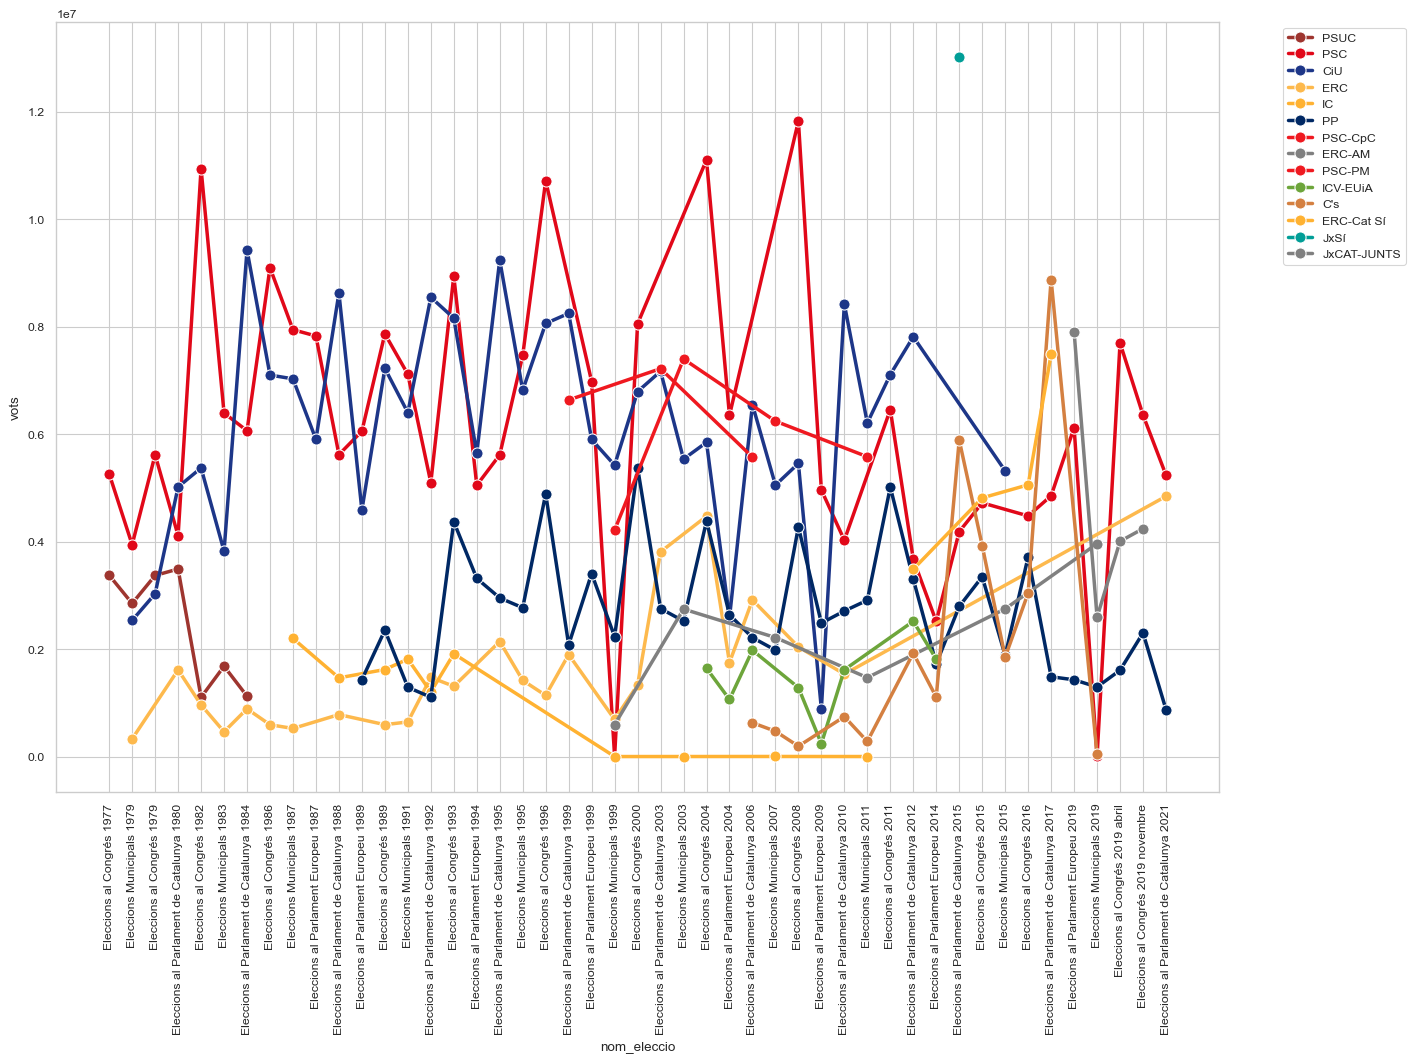

In [103]:
# Create new dataframe with important candidatures
important_candidatures_info = candidatures_info[
    candidatures_info["num_votes"] > 10000000
]

# Filter the original dataset with the important candidatures
important_candidatures_df = df[
    df["candidatura_sigles"].isin(important_candidatures_info.candidatura_sigles)
]

# Replace NaN values in the 'candidatura_color' column with a default color, e.g., 'grey'
important_candidatures_df["candidatura_color"].fillna("grey", inplace=True)

# For each election each candidature must only appear once, aggregated by the sum of votes
important_candidatures_df = (
    important_candidatures_df.groupby(["nom_eleccio", "year", "candidatura_sigles"])
    .agg({"vots": "sum", "candidatura_color": "first"})
    .reset_index()
)

# Sort the DataFrame by 'year'
important_candidatures_df = important_candidatures_df.sort_values(by="year")

# Create a color palette dictionary
color_palette = {
    sigles: color
    for sigles, color in zip(
        important_candidatures_df["candidatura_sigles"],
        important_candidatures_df["candidatura_color"],
    )
}

# Plot temporal evolution of the number of votes for the important candidatures
sns.set_style("whitegrid")
sns.set_context("paper")

plt.figure(figsize=(15, 10))
sns.lineplot(
    x="nom_eleccio",
    y="vots",
    hue="candidatura_sigles",
    data=important_candidatures_df,
    palette=color_palette,
    markers=True,
    dashes=False,
    linewidth=2.5,
    marker="o",
    markersize=8,
)
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=90)

plt.show()

In [94]:
# Check parties that appear more than once in the same election
important_candidatures_df[
    important_candidatures_df.duplicated(
        subset=["year", "candidatura_sigles"], keep=False
    )
]

,nom_eleccio,year,candidatura_sigles,vots,candidatura_color
0,Eleccions Municipals 1979,1979,CC-UCD,1921910,#178C3E
1,Eleccions Municipals 1979,1979,CiU,2534149,#1D3688
3,Eleccions Municipals 1979,1979,PSC,3943074,#DD2809
4,Eleccions Municipals 1979,1979,PSUC,2849457,#9E352F
11,Eleccions Municipals 1987,1987,A.P.,1219398,#95311C
...,...,...,...,...,...
231,Eleccions al Parlament de Catalunya 2003,2003,PP,2754493,#01A7E3
251,Eleccions al Parlament de Catalunya 2015,2015,C's,5890912,#D48041
252,Eleccions al Parlament de Catalunya 2015,2015,CUP,2702352,#fdf000
254,Eleccions al Parlament de Catalunya 2015,2015,PP,2793544,#01A7E3


## Add the month and day of the elections